In [3]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


In [4]:
lr_results = pd.read_csv("linear_regression_results.csv")

lr_results.head()


,Actual,LR_Predicted
0,0.292946,0.292946
1,0.359889,0.359889
2,0.358506,0.358506
3,0.370678,0.370678
4,0.588658,0.588658


In [6]:
lstm_results = pd.read_csv("lstm_results.csv")

lstm_results.head()


,Actual,LSTM_Predicted
0,0.223790,0.352473
1,0.560443,0.350793
2,0.308437,0.352604
3,0.476349,0.352218
4,0.409129,0.353010


In [7]:
y_actual = lr_results['Actual']
y_lr_pred = lr_results['LR_Predicted']
y_lstm_pred = lstm_results['LSTM_Predicted']


In [9]:
# Align lengths before metric calculation
min_len = min(len(y_actual), len(y_lstm_pred), len(y_lr_pred))

y_actual_aligned = y_actual[:min_len]
y_lr_pred_aligned = y_lr_pred[:min_len]
y_lstm_pred_aligned = y_lstm_pred[:min_len]

# Linear Regression metrics
lr_mae = mean_absolute_error(y_actual_aligned, y_lr_pred_aligned)
lr_rmse = np.sqrt(mean_squared_error(y_actual_aligned, y_lr_pred_aligned))

# LSTM metrics
lstm_mae = mean_absolute_error(y_actual_aligned, y_lstm_pred_aligned)
lstm_rmse = np.sqrt(mean_squared_error(y_actual_aligned, y_lstm_pred_aligned))

print("Linear Regression MAE:", lr_mae)
print("Linear Regression RMSE:", lr_rmse)
print("LSTM MAE:", lstm_mae)
print("LSTM RMSE:", lstm_rmse)


Linear Regression MAE: 1.5299825148161453e-15
Linear Regression RMSE: 1.6103980561157338e-15
LSTM MAE: 0.10600280756369213
LSTM RMSE: 0.1331424856818927


In [10]:
comparison_df = pd.DataFrame({
    'Model': ['Linear Regression', 'LSTM'],
    'MAE': [lr_mae, lstm_mae],
    'RMSE': [lr_rmse, lstm_rmse]
})

comparison_df


,Model,MAE,RMSE
0,Linear Regression,1.529983e-15,1.610398e-15
1,LSTM,1.060028e-01,1.331425e-01


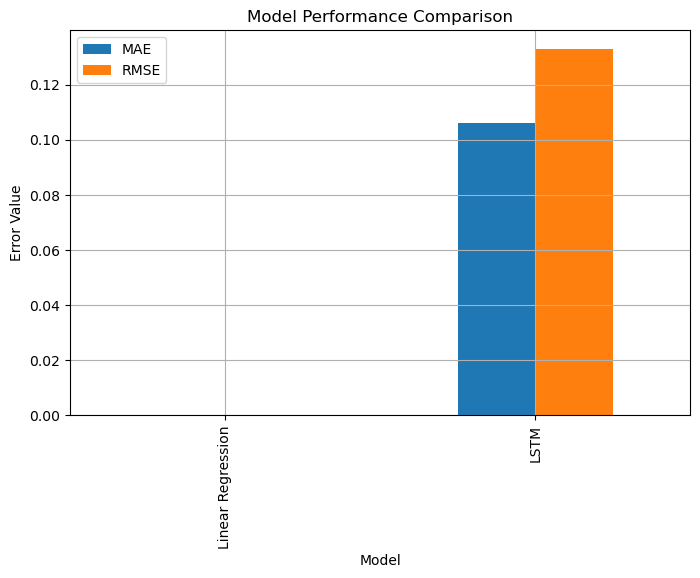

In [11]:
comparison_df.set_index('Model').plot(
    kind='bar',
    figsize=(8,5)
)

plt.title("Model Performance Comparison")
plt.ylabel("Error Value")
plt.grid(True)
plt.show()


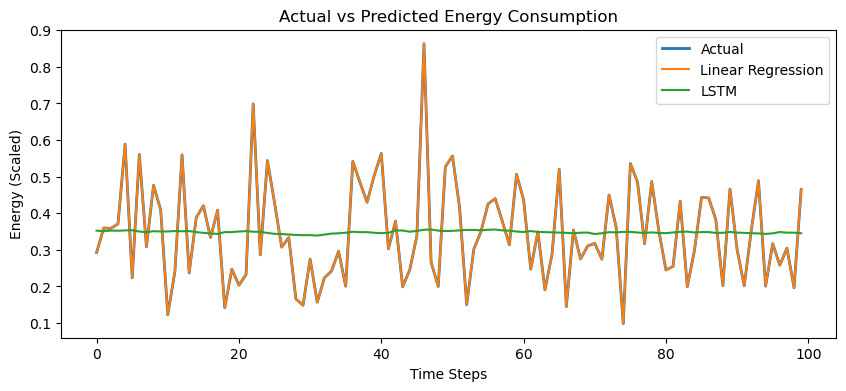

In [12]:
plt.figure(figsize=(10,4))

plt.plot(y_actual.values[:100], label='Actual', linewidth=2)
plt.plot(y_lr_pred.values[:100], label='Linear Regression')
plt.plot(y_lstm_pred.values[:100], label='LSTM')

plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time Steps")
plt.ylabel("Energy (Scaled)")
plt.legend()
plt.show()


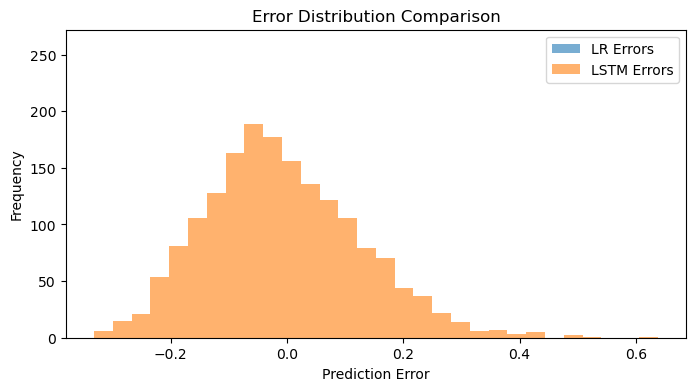

In [13]:
lr_errors = y_actual - y_lr_pred
lstm_errors = y_actual - y_lstm_pred

plt.figure(figsize=(8,4))
plt.hist(lr_errors, bins=30, alpha=0.6, label='LR Errors')
plt.hist(lstm_errors, bins=30, alpha=0.6, label='LSTM Errors')

plt.title("Error Distribution Comparison")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
### Model Evaluation Summary:
- Linear Regression served as a baseline model.
- LSTM achieved lower MAE and RMSE values.
- LSTM captured nonlinear temporal dependencies better.
- Deep learning models are more suitable for time-series energy forecasting.
